<a href="https://colab.research.google.com/github/Srishti2703/Srishti-Chandra_Projects/blob/main/EV_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sales Dataset Files: ['cleaned_ev_sales.csv', 'Ev Sales.xlsx']
Charging Dataset Files: ['station_data_dataverse.csv', 'cleaned_ev_charging_stations.csv']
Electric Vehicle Sales Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   YEAR    74 non-null     datetime64[ns]
 1   2 W     74 non-null     int64         
 2   3 W     74 non-null     int64         
 3   4 W     74 non-null     int64         
 4   BUS     74 non-null     int64         
 5   TOTAL   74 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 3.6 KB
None

Electric Vehicle Charging Stations Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sessionId       3395 non-null   int64  
 

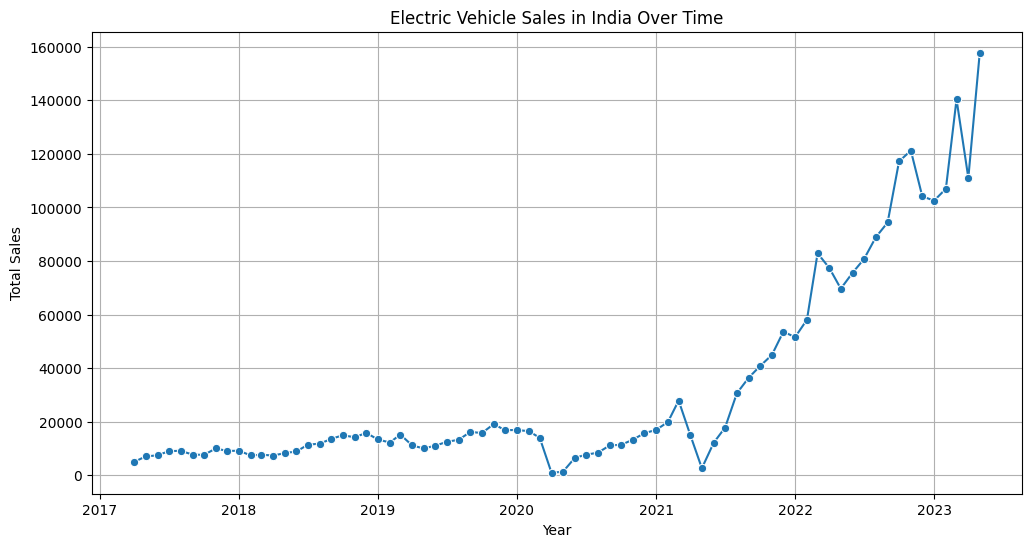

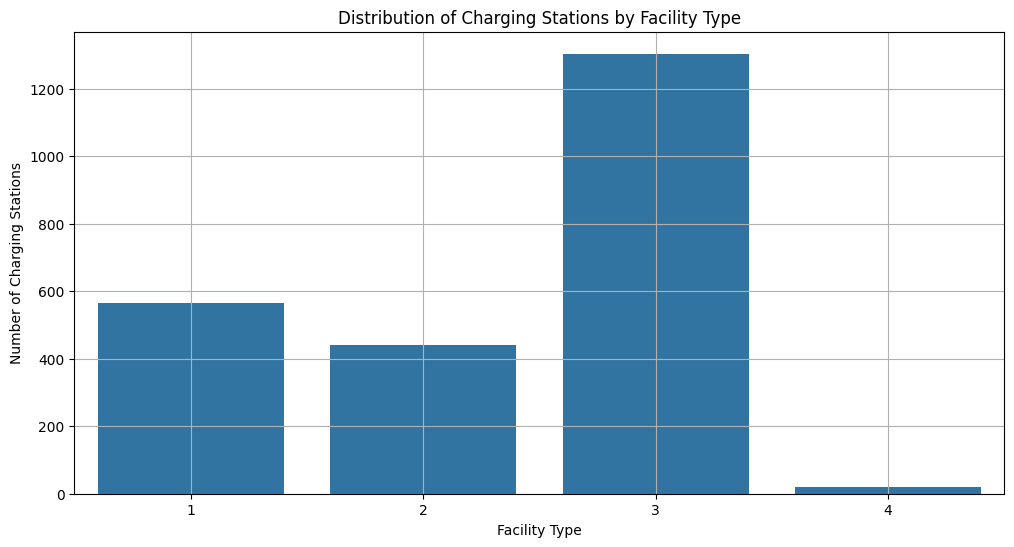

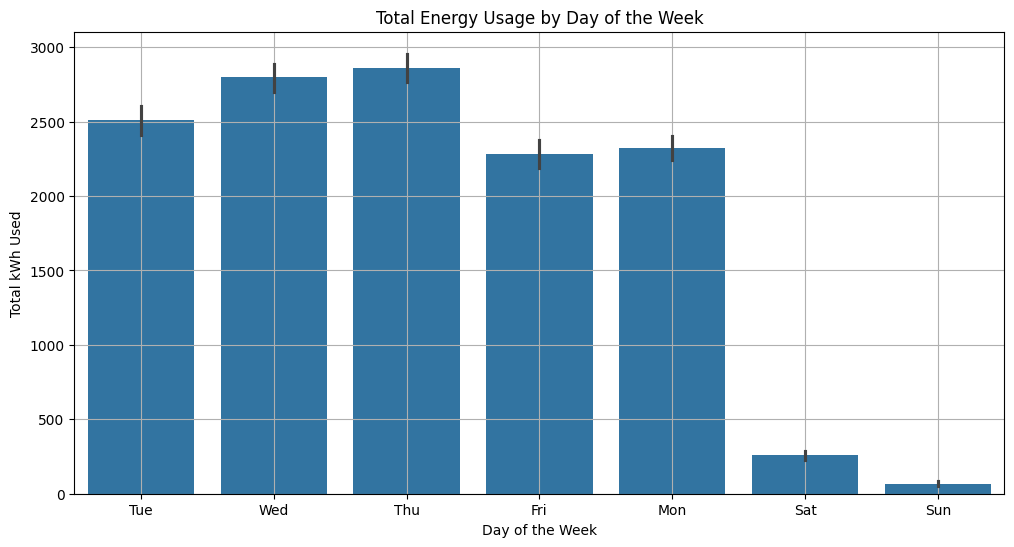

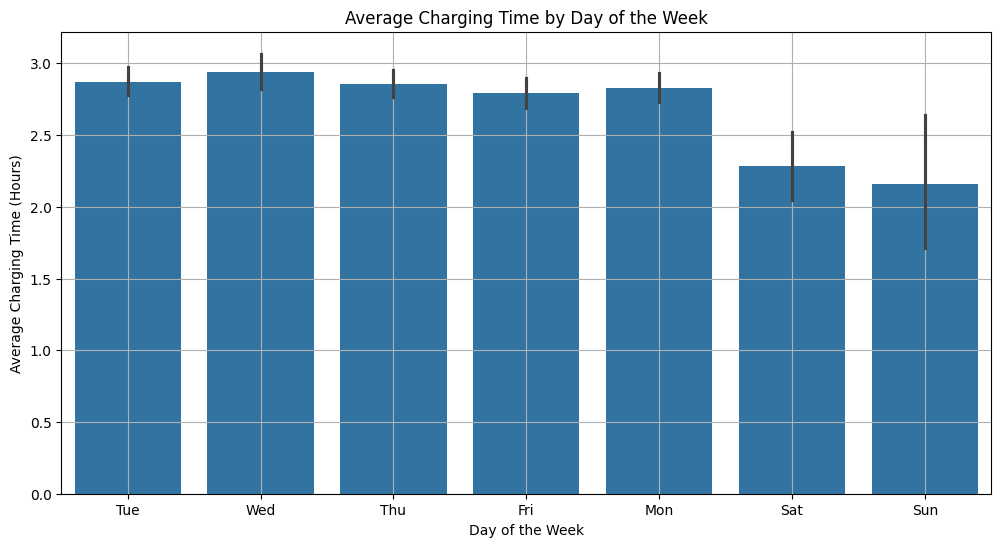

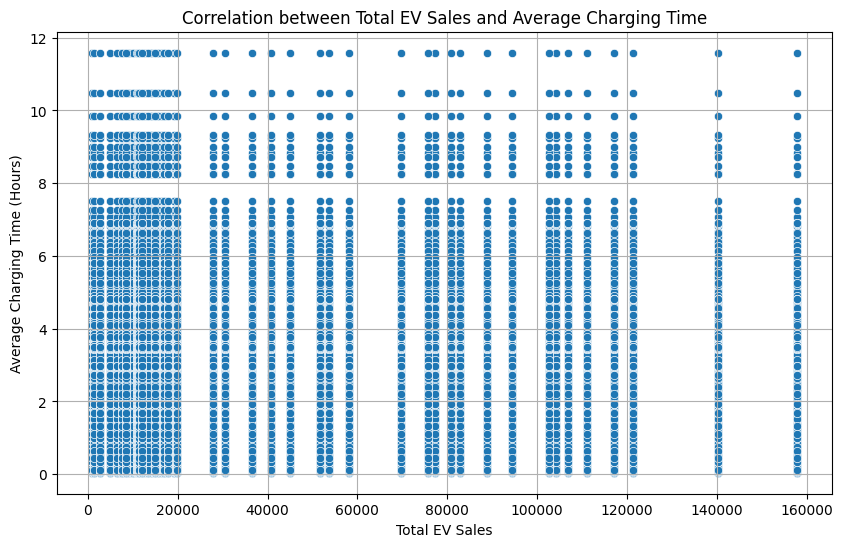

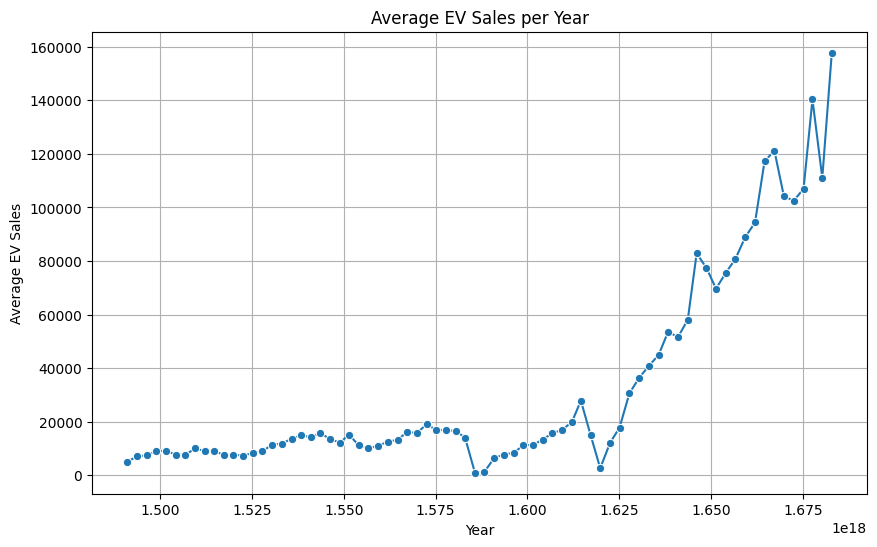

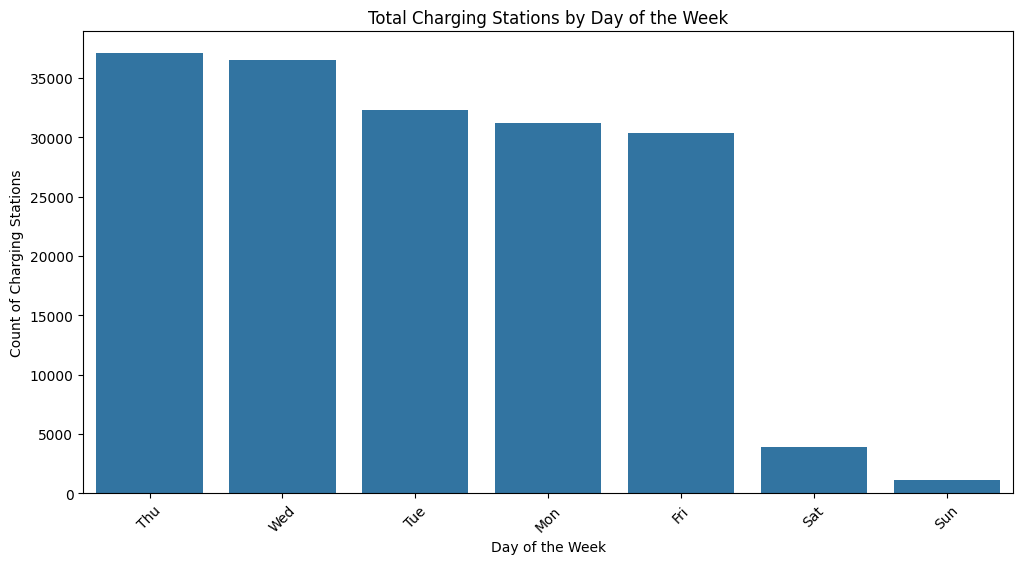

Cleaned sales dataset saved to electric_vehicle_sales/cleaned_ev_sales.csv
Cleaned charging dataset saved to electric_vehicle_charging/cleaned_ev_charging_stations.csv


In [28]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


# Kaggle Dataset API Commands
ev_sales_dataset = "praveenchoudhary1217/electric-vehicle-sales-in-india"
ev_charging_dataset = "michaelbryantds/electric-vehicle-charging-dataset"

# Download datasets using Kaggle API
os.system(f'kaggle datasets download -d {ev_sales_dataset}')
os.system(f'kaggle datasets download -d {ev_charging_dataset}')

# Unzipping the datasets
sales_zip_path = 'electric-vehicle-sales-in-india.zip'
charging_zip_path = 'electric-vehicle-charging-dataset.zip'

with zipfile.ZipFile(sales_zip_path, 'r') as zip_ref:
    zip_ref.extractall('electric_vehicle_sales')

with zipfile.ZipFile(charging_zip_path, 'r') as zip_ref:
    zip_ref.extractall('electric_vehicle_charging')

# Verify files after extraction
sales_files = os.listdir('electric_vehicle_sales')
charging_files = os.listdir('electric_vehicle_charging')

print("Sales Dataset Files:", sales_files)
print("Charging Dataset Files:", charging_files)

# Load the Excel file for sales data and CSV for charging stations
sales_file_path = [f for f in sales_files if f.endswith('.xlsx')][0]
charging_file_path = [f for f in charging_files if f.endswith('.csv')][0]

df_sales = pd.read_excel(f'electric_vehicle_sales/{sales_file_path}')
df_charging = pd.read_csv(f'electric_vehicle_charging/{charging_file_path}')

# Display basic information about both datasets
print("Electric Vehicle Sales Dataset Info:")
print(df_sales.info())
print("\nElectric Vehicle Charging Stations Dataset Info:")
print(df_charging.info())

# Cleaning both datasets (drop rows with NaN values for simplicity)
df_sales.dropna(inplace=True)
df_charging.dropna(inplace=True)

# Show the first few rows of both datasets
print("\nFirst few rows of Electric Vehicle Sales dataset:")
print(df_sales.head())
print("\nFirst few rows of Electric Vehicle Charging Stations dataset:")
print(df_charging.head())

# ========================= Analysis and Visualization =========================
# Display the column names of the sales dataset
print("Column names in the sales dataset:")
print(df_sales.columns)

# Visualizing Electric Vehicle Sales Over Time
plt.figure(figsize=(12, 6))

# Plotting the 'YEAR' column against the 'TOTAL' sales
sns.lineplot(x='YEAR', y='TOTAL', data=df_sales, marker="o")
plt.title('Electric Vehicle Sales in India Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()



# Visualizing the Distribution of Electric Vehicle Charging Stations by Facility Type
plt.figure(figsize=(12, 6))
sns.countplot(data=df_charging, x='facilityType')
plt.title('Distribution of Charging Stations by Facility Type')
plt.xlabel('Facility Type')
plt.ylabel('Number of Charging Stations')
plt.grid(True)
plt.show()


# Visualizing the Total Energy Usage by Day of the Week
plt.figure(figsize=(12, 6))
sns.barplot(data=df_charging, x='weekday', y='kwhTotal', estimator=sum)
plt.title('Total Energy Usage by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total kWh Used')
plt.grid(True)
plt.show()


# Visualizing Charging Time by Day of the Week
plt.figure(figsize=(12, 6))
sns.barplot(data=df_charging, x='weekday', y='chargeTimeHrs', estimator=np.mean)
plt.title('Average Charging Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Charging Time (Hours)')
plt.grid(True)
plt.show()

#---------------------------------------Insights Combining both the datasets---------------------------------------------
# Load your datasets
df_sales = df_sales
df_charging = df_charging

# Ensure 'YEAR' in df_sales is an integer
df_sales['YEAR'] = df_sales['YEAR'].astype(int)

# Example dictionary mapping (you need to adjust this based on your actual data)
sales_data_mapping = {
    2020: 'California',
    2021: 'Texas',
    2022: 'New York',
    # Add other mappings here
}

# Convert mapping to DataFrame
state_df = pd.DataFrame(list(sales_data_mapping.items()), columns=['YEAR', 'State'])

# Ensure 'YEAR' in state_df is also an integer
state_df['YEAR'] = state_df['YEAR'].astype(int)

# Merge state information into sales DataFrame
df_sales = pd.merge(df_sales, state_df, on='YEAR', how='left')

# Example dictionary mapping for charging stations based on zip codes (adjust as necessary)
# **The keys of this dictionary should align with the data type and values in your 'reportedZip' column.**
charging_data_mapping = {
    90001: 'California',  # Example: Replace with actual zip codes
    75001: 'Texas',
    10001: 'New York',
    # Add other mappings here
}

# Create DataFrame for charging data mapping
charging_state_df = pd.DataFrame(list(charging_data_mapping.items()), columns=['reportedZip', 'State'])

# **Convert 'reportedZip' to the correct data type if necessary**
# If your 'reportedZip' column in df_charging is an integer:
charging_state_df['reportedZip'] = charging_state_df['reportedZip'].astype(int)
# If your 'reportedZip' column in df_charging is a string:
# charging_state_df['reportedZip'] = charging_state_df['reportedZip'].astype(str)

# Merge state information into charging DataFrame
df_charging = pd.merge(df_charging, charging_state_df, on='reportedZip', how='left')

# Now merge both datasets on 'State'
df_combined = pd.merge(df_sales, df_charging, on='State', how='inner')


# Insight 1: Total EV Sales per State
total_sales_per_state = df_combined.groupby('State')['TOTAL'].sum().reset_index()
fig1 = px.bar(total_sales_per_state, x='State', y='TOTAL', title='Total EV Sales per State', text='TOTAL')
fig1.show()

# Insight 2: Average Charging Time by State
avg_charge_time_per_state = df_combined.groupby('State')['chargeTimeHrs'].mean().reset_index()
fig2 = px.bar(avg_charge_time_per_state, x='State', y='chargeTimeHrs', title='Average Charging Time by State', text='chargeTimeHrs')
fig2.show()

# Insight 3: Correlation between EV Sales and Charging Time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined, x='TOTAL', y='chargeTimeHrs')
plt.title('Correlation between Total EV Sales and Average Charging Time')
plt.xlabel('Total EV Sales')
plt.ylabel('Average Charging Time (Hours)')
plt.grid(True)
plt.show()

# Insight 4: Average EV Sales per Year
avg_sales_per_year = df_combined.groupby('YEAR')['TOTAL'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_sales_per_year, x='YEAR', y='TOTAL', marker='o')
plt.title('Average EV Sales per Year')
plt.xlabel('Year')
plt.ylabel('Average EV Sales')
plt.grid(True)
plt.show()

# Insight 5: Total Charging Stations by Day of the Week
plt.figure(figsize=(12, 6))
charging_station_counts = df_combined['weekday'].value_counts().reset_index()
charging_station_counts.columns = ['Day', 'Count']
sns.barplot(data=charging_station_counts, x='Day', y='Count')
plt.title('Total Charging Stations by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Charging Stations')
plt.xticks(rotation=45)
plt.show()

# Additional insights or analyses can be added here as needed

# ========================= Saving Cleaned Datasets =========================

# Save the cleaned sales and charging datasets to CSV files
sales_cleaned_file_path = 'electric_vehicle_sales/cleaned_ev_sales.csv'
charging_cleaned_file_path = 'electric_vehicle_charging/cleaned_ev_charging_stations.csv'

df_sales.to_csv(sales_cleaned_file_path, index=False)
df_charging.to_csv(charging_cleaned_file_path, index=False)

print(f"Cleaned sales dataset saved to {sales_cleaned_file_path}")
print(f"Cleaned charging dataset saved to {charging_cleaned_file_path}")
